In [1]:
import numpy as np
import matplotlib.pyplot as plt
import time
from objective_functions.simple_function import * 

from tqdm import tqdm
from algorithms.gradient_descent import *
from algorithms.nesterov_gradient_descent import *
from algorithms.newton import *
from algorithms.sub_sampled_newton import *
from algorithms.nesterov_sub_sampled_newton import *
from plots_and_weights.optimality_gaps import *
from plots_and_weights.plot_graph import *

In [2]:
A = np.eye(2)
b = np.zeros((2,1))

In [3]:
f = f()

In [4]:
d = 2
A = np.diag([6,2])
b = np.ones((2,))
st = 0.5 # stop time
ss = 20*d  # sampling size
lambd = 0.00001
alpha = 0.00005
x_init = np.array([10., -20.])
w, t = newton(A, b, x_init, f, lambd, st)
w_stars = w[len(t)-1]

Newton computation time: 0.5000052452087402


In [5]:
w0, t0 = newton(A, b, np.array([10., -20.]), f, lambd, st)
w1, t1 = sub_sampled_newton_rnss(A, b, np.array([10., -20.]), f, lambd, st, ss)
w2, t2 = gd(A, b, np.array([10., -20.]), f, lambd, st, alpha)
w3, t3 = nesterov_gd(A, b, np.array([10., -20.]), f, lambd, st, alpha)
w4, t4 = nesterov_sub_sampled_newton_rnss(A, b, np.array([10., -20.]), f, lambd, st, ss)

Newton computation time: 0.5000019073486328
Sub-sampled Newton rnss computation time: 0.500006914138794
GD computation time: 0.5000009536743164
Nesterov GD computation time: 0.5000028610229492
Nesterov Sub-sampled Newton rnss computation time: 0.5000019073486328


In [6]:
ws = [w0,w1,w2,w3,w4]
ts = [t0,t1,t2,t3,t4]
ts_iter = [np.arange(len(t)) for t in ts]

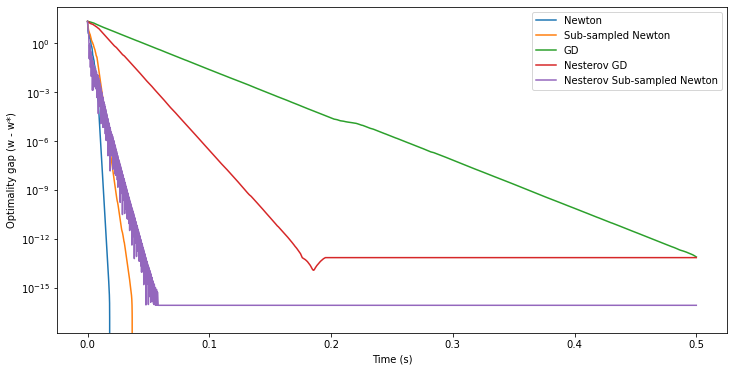

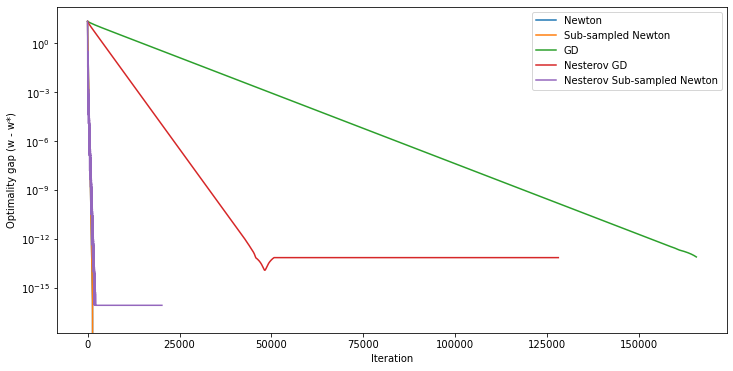

In [7]:
w_gaps = compute_w_gaps(ws, ts, w_stars)
plot_graph(ts, w_gaps, 'Time (s)', 'Optimality gap (w - w*)')
plot_graph(ts_iter, w_gaps, 'Iteration', 'Optimality gap (w - w*)')

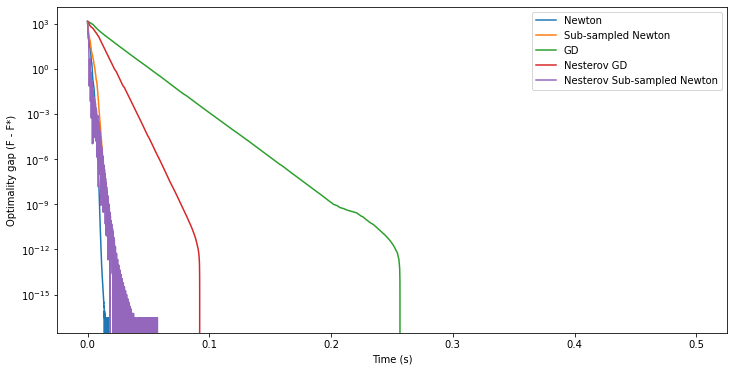

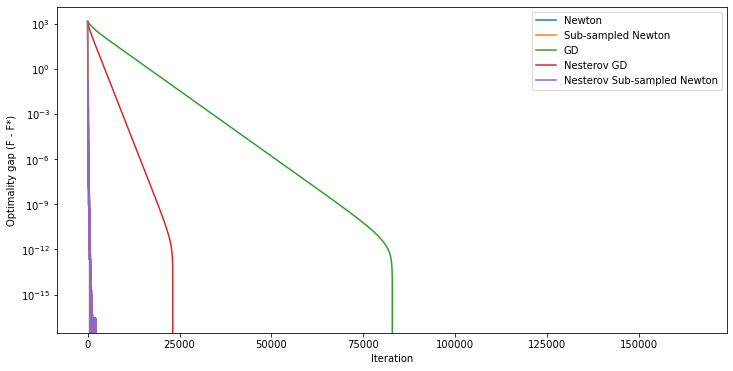

In [8]:
f_gaps = compute_f_gaps(A, b, ws, ts, w_stars, f)
plot_graph(ts, f_gaps, 'Time (s)', 'Optimality gap (F - F*)')
plot_graph(ts_iter, f_gaps, 'Iteration', 'Optimality gap (F - F*)')